In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../working"))

# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', 'cifar-no-augment.h5', '__notebook_source__.ipynb']


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, Lambda, MaxPooling2D
from keras.initializers import TruncatedNormal
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
num_classes = 10

model = Sequential()
# model.add(Lambda(augment_2d,
#                  input_shape=x_train.shape[1:],
#                  arguments={'rotation': 8.0, 'horizontal_flip': True}))

model.add(Conv2D(32, (3, 3), padding='same',input_shape=(256, 256, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 254, 254, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 127, 127, 64)      18496     
__________

In [4]:
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        #shear_range=0.2,
        #zoom_range=0.2,
        #horizontal_flip=True
        validation_split = 0.2
        )

#test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '../input/train',
        target_size=(256, 256),
        batch_size=32,
        subset = 'training'
        #class_mode='binary'
        )

validation_generator = train_datagen.flow_from_directory(
        '../input/train',
        target_size=(256, 256),
        batch_size=32,
        subset = 'validation'
        #class_mode='binary'
        )


mlp_hist = model.fit_generator(
        train_generator,
        #steps_per_epoch=2000, uses len(generator)
        epochs=20,
        validation_data=validation_generator,
        #validation_steps=800 uses len(generator)
        )

#model.save("mlp-128-64b.h5")
#mlp.load_weights("../input/simple-neural-network/mlp-768-192.h5")
#accuracy = mlp.evaluate_generator(validation_generator)

#print("Accuracy: ",accuracy)
#output.show()

Found 2200 images belonging to 10 classes.
Found 550 images belonging to 10 classes.
Epoch 1/20
69/69 [==============================] - 606s 9s/step - loss: 2.3474 - acc: 0.1733 - val_loss: 2.1047 - val_acc: 0.2236
Epoch 2/20
69/69 [==============================] - 544s 8s/step - loss: 1.9066 - acc: 0.3000 - val_loss: 1.9517 - val_acc: 0.3091
Epoch 3/20
69/69 [==============================] - 543s 8s/step - loss: 1.7499 - acc: 0.3755 - val_loss: 1.8992 - val_acc: 0.3091
Epoch 4/20
69/69 [==============================] - 555s 8s/step - loss: 1.5966 - acc: 0.4389 - val_loss: 1.7227 - val_acc: 0.4273
Epoch 5/20
69/69 [==============================] - 550s 8s/step - loss: 1.4508 - acc: 0.5039 - val_loss: 1.7437 - val_acc: 0.4055
Epoch 6/20
69/69 [==============================] - 547s 8s/step - loss: 1.3038 - acc: 0.5592 - val_loss: 1.6500 - val_acc: 0.4473
Epoch 7/20
69/69 [==============================] - 544s 8s/step - loss: 1.1704 - acc: 0.6046 - val_loss: 1.5522 - val_acc: 0.469

In [8]:
model.save("cifar-no-augment.h5")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0,0.5,'Accuracy')

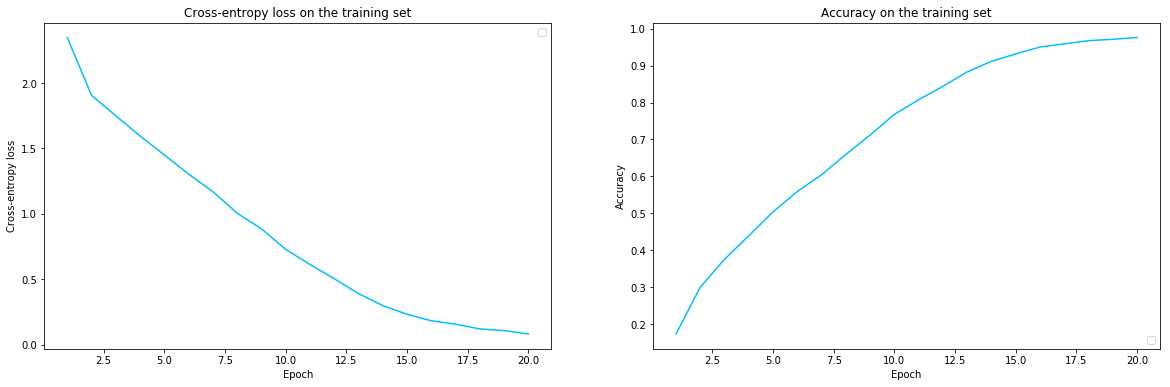

In [7]:
# mlp_loss, mlp_acc = mlp.evaluate(x_test, y_test)
# print('\nΣυνάρτηση κόστους: \t{:.2f}\nΑκρίβεια:\t\t{:.2f}%'.format(mlp_loss, 100*mlp_acc))
import matplotlib.pyplot as plt
epochs = 20
# # epochs=30
# # mlp.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
# # mlp_hist = mlp.fit(x_train, y_train, epochs=epochs, batch_size=32)


plt.rcParams["figure.figsize"] = (20,6)
plt.subplot(1, 2, 1)
plt.plot(range(1,epochs+1), mlp_hist.history['loss'], c='deepskyblue')
plt.legend()
plt.title('Cross-entropy loss on the training set')
plt.xlabel('Epoch')
plt.ylabel('Cross-entropy loss')
plt.subplot(1, 2, 2)
plt.plot(range(1,epochs+1), mlp_hist.history['acc'], c='deepskyblue')
plt.legend(loc='lower right')
plt.title('Accuracy on the training set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')